# Preamble

In [1]:
import numpy as np
import random
import math
import networkx as nx
import matplotlib.pyplot as plt
import os
import time

In [2]:
# Define the subdirectory name for storing figures
fig_subdirectory = "Figures"
if not os.path.exists(fig_subdirectory):    # Check if the subdirectory exists
    os.makedirs(fig_subdirectory)
    
# For writing data
data_subdirectory = "Data"
if not os.path.exists(data_subdirectory):
    os.makedirs(data_subdirectory)

# Loading dependencies

In [3]:
%run ./Generate_Network_Topology.ipynb

%run ./Generating_CRs.ipynb 

%run ./Links.ipynb

0 1
1 2
2 3


# Given

In [4]:
# 21 Edges in NSFNET
edges = [ (1, 2, 1100),  #Edge between Node 0 and Node 1
             (2, 3, 1600), #Intermediate Edge between Node 1 and Node 2
             (1, 3, 600), # Edge between Node 0 and Node 2
             (2, 8, 1500), # Edge between Node 1 and Node 7
             (1, 4, 1000),  # Edge between Node 0 and Node 3
             
         (4, 5, 600), # Edge between Node 3 and Node 4
             (5, 7, 800), # Intermediate edge between Node 4 and Node 6
             (7, 8, 700), # Intermediate edge between Node 6 and Node 7
             (10, 11, 900), # Edge Betweeen Node 9 and Node 10
             (4, 9, 1500), # Edge Betweeen Node 3 and Node 8
         
         (9, 12, 800), # Edge Betweeen Node 8 and Node 11
             (8, 10, 700), # Edge Betweeen Node 7 and Node 9
             (10, 12, 500), # Edge Betweeen Node 9 and Node 11
             (9, 14, 800), # Edge Betweeen Node 8 and Node 13
             (10, 14, 500), # Edge Betweeen Node 9 and Node 13
         
         (12, 13, 300), # Edge Betweeen Node 11 and Node 12
             (13, 14, 300), # Edge Betweeen Node 12 and Node 13
             (3, 6, 1000), # Edge Betweeen Node 2 and Node 5
             (6, 5, 1100), # Edge Betweeen Node 5 and Node 4
             (6, 13, 2000), # Edge Betweeen Node 5 and Node 12
         
         (6, 11, 1200), # Edge Betweeen Node 5 and Node 10
        ]

# Execution

Number of Nodes:  14
Number of Links : 21


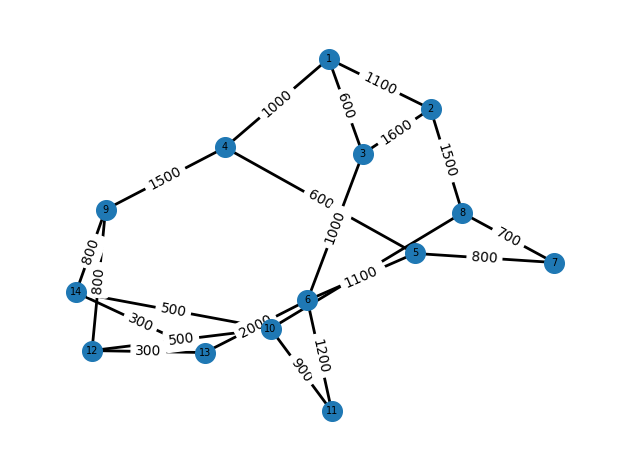

Running QKRA-AWSL for numCR = 25 with j_range = 33(factor = 25), k = 10, iterations = 100

All CRs for X = 25 dealt with :
The Success rate of connection requests(SRCR) is : 1.0
The NSP of the network is : 101
The time-slot utilization ratio(TUR) is :  [0.07777777777777778, 0.10119047619047619, 0.07142857142857142, 0.06746031746031746]

All CRs for X = 50 dealt with :
The Success rate of connection requests(SRCR) is : 1.0
The NSP of the network is : 199
The time-slot utilization ratio(TUR) is :  [0.18571428571428572, 0.23214285714285715, 0.16666666666666666, 0.17063492063492064]

All CRs for X = 75 dealt with :
The Success rate of connection requests(SRCR) is : 1.0
The NSP of the network is : 300
The time-slot utilization ratio(TUR) is :  [0.25873015873015875, 0.31547619047619047, 0.2619047619047619, 0.21825396825396826]

All CRs for X = 100 dealt with :
The Success rate of connection requests(SRCR) is : 1.0
The NSP of the network is : 398
The time-slot utilization ratio(TUR) is :  [0.

In [5]:
#%%capture
start_time = time.time()

# Creates the nsfnet topology
g_nsfnet = create_topology(edges) 
numNodes = len(g_nsfnet)

# Set the ASLC
aslc = "AWSL"

# Open the file to write data to
filename = "QKRA-" + aslc + ".txt"
data_path = os.path.join(data_subdirectory, filename)
file = open(data_path, "a")

# Modify : numCR, k, num_iter, j_range, factor
numCR = 25
#numCR = int(input("Input the number of CRs to be generates"))
k = 10    # K sp
num_iter = 100    # Average over
j_range = 33    # X steps
#factor = int(input("Input the multiplication factor"))
factor = 25    # Step multiplication factor. 10 if X>=100

# Initializing the arrays to store data of j_range X for num_iter
srcr = np.zeros([num_iter, j_range])
tur = np.zeros([num_iter, j_range])
nsp = np.zeros([num_iter, j_range]).astype(int)
x = np.zeros([num_iter, j_range]).astype(int)

file.write(f"\n\nQKRA-{aslc}: k = {k}, Averaged over(z) = {num_iter} : \n")

print(f"Running QKRA-{aslc} for numCR = {numCR} with j_range = {j_range}(factor = {factor}), k = {k}, iterations = {num_iter}") 

for z in range(num_iter):    # Loop to average over the same list of X
    
    X = numCR   
    j = 0    
    %run ./QKRA.ipynb
    #print("#########################################################################################################################################")
    print(f"\nIteration {z+1} complete")
    print("#########################################################################################################################################\n")
##
 
print("Simulation Ended")

end_time = time.time()
elapsed_time = f"{int((end_time - start_time)/3600)}h {int((end_time - start_time)//60)}m {(end_time - start_time)%60 : .2f}s"
#elapsed_time_hrs = round((end_time - start_time)/3600, 4)

In [6]:
elapsed_time = f"{int((end_time - start_time)/3600)}h {int((end_time - start_time)/60 % 60)}m {(end_time - start_time)%60 : .2f}s"
elapsed_time

'5h 25m  27.83s'

In [7]:
print("Start time : ", start_time)
print("End time : ", end_time)
print(f"Elapsed Time : {elapsed_time}")

Start time :  1708496243.0155067
End time :  1708515770.8408778
Elapsed Time : 5h 25m  27.83s


In [8]:
# Initializing arrays to calculate the averages
avg_srcr = np.zeros(j_range)
avg_tur = np.zeros(j_range)
avg_nsp = np.zeros(j_range)
avg_x = np.zeros(j_range)

for j in range(j_range):
    for i in range(num_iter):    # Summing over num_iter
        avg_srcr[j] += srcr[i, j] 
        avg_tur[j] += tur[i, j] 
        avg_nsp[j] += nsp[i, j] 
        avg_x[j] += x[i, j] 

avg_srcr /= num_iter
avg_tur /= num_iter 
avg_nsp /= num_iter
avg_x /= num_iter 

file.write(f"\nX range : {', '.join(map(str, avg_x))} \nAverage SRCR : {', '.join(map(str, avg_srcr))} \nAverage TUR : {', '.join(map(str, avg_tur))} \nAverage NSP : {', '.join(map(str, avg_nsp))}\n")
file.close()

# Display Data

In [9]:
print(f"Average SRCR : {avg_srcr}, \nAverage TUR : {avg_tur}, \nAverage NSP : {avg_nsp}, \nX : {avg_x}")

Average SRCR : [1.         1.         1.         1.         0.99888    0.99146667
 0.9644     0.9167     0.86644444 0.82512    0.77029091 0.7294
 0.69403077 0.66091429 0.62762667 0.59955    0.56931765 0.54313333
 0.52141053 0.50118    0.48173333 0.46221818 0.44791304 0.43323333
 0.419632   0.40832308 0.39557037 0.3847     0.37384828 0.36377333
 0.35427097 0.3462875  0.33629091], 
Average TUR : [0.08892063 0.17873016 0.26911111 0.35838095 0.45080952 0.53684127
 0.61512698 0.66807937 0.70585714 0.73628571 0.76009524 0.78104762
 0.79766667 0.81265079 0.8272381  0.83953968 0.85265079 0.8618254
 0.86911111 0.88033333 0.88768254 0.89325397 0.9004127  0.9062381
 0.91073016 0.91809524 0.92365079 0.92550794 0.9301746  0.9344127
 0.93615873 0.9418254  0.94273016], 
Average NSP : [  99.92  200.09  299.44  396.96  490.62  579.66  653.3   708.95  754.75
  801.    821.92  849.94  877.57  901.21  919.76  937.72  947.42  959.94
  974.24  986.37  996.27 1003.21 1017.59 1028.16 1037.34 1050.17 1057.49
 

# Plotting

Plot 1 : SRCR and TUR

Plot2 : NSP

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


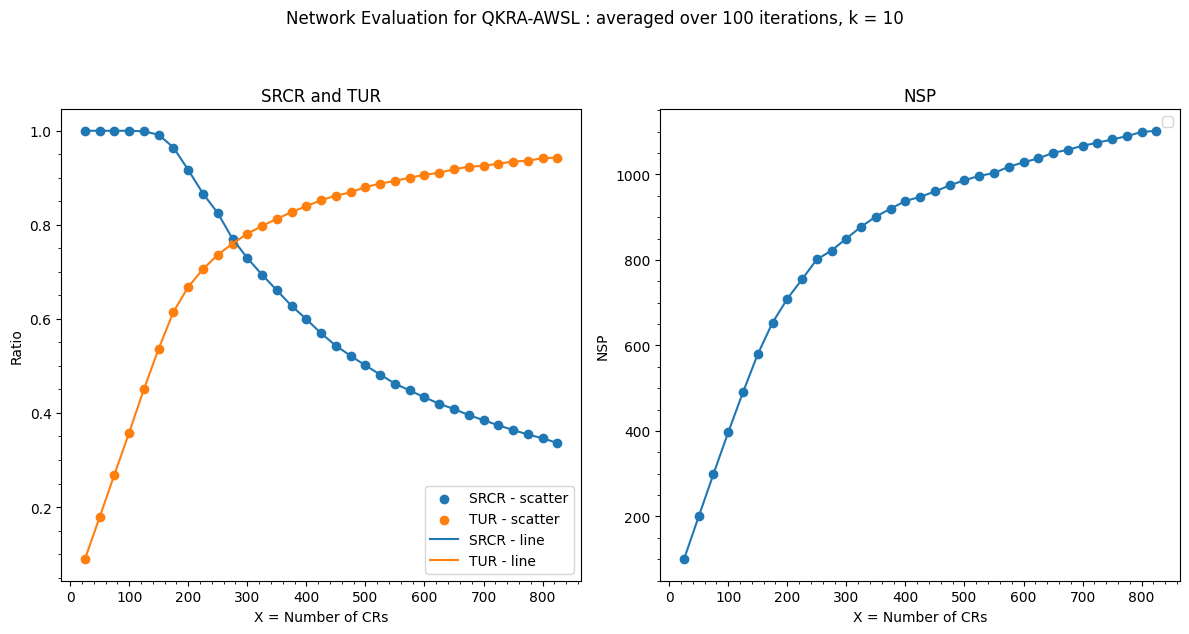

AWSL - z = 100, k = 10 for X - 25.0 to 825.0.jpeg


In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.scatter(avg_x, avg_srcr, label='SRCR - scatter') 
ax1.scatter(avg_x, avg_tur, label='TUR - scatter')
ax2.scatter(avg_x, avg_nsp)

ax1.plot(avg_x, avg_srcr, label='SRCR - line')
ax1.plot(avg_x, avg_tur, label='TUR - line')
ax2.plot(avg_x, avg_nsp)


ax1.set_xlabel('X = Number of CRs')
ax1.set_ylabel('Ratio')
ax1.set_title("SRCR and TUR")
ax1.minorticks_on()
ax1.legend(loc='best')

ax2.set_xlabel('X = Number of CRs')
ax2.set_ylabel('NSP')
ax2.set_title("NSP")
ax2.minorticks_on()
ax2.legend(loc='best')

fig.suptitle(f"Network Evaluation for QKRA-{aslc} : averaged over {num_iter} iterations, k = {k}", y=1.05)  # Place title above subplots
#fig.legend(loc='best')

# Show the plot
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


# Saving the plot
filename = (f"{aslc} - z = {num_iter}, k = {k} for X - {str(avg_x[0])} to {str(avg_x[-1])}.jpeg")
print(filename)

# Combine the subdirectory and filename to create the full path
fig_path = os.path.join(fig_subdirectory, filename)
#plt.savefig(fig_path, dpi=300, bbox_inches='tight')